In [1]:
from keras.datasets import imdb

### Data Preparation

In [ ]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [ ]:
print(len(XT))
print(len(YT))
print(len(Xt))

In [ ]:
print(XT[0])

In [ ]:
word_idx = imdb.get_word_index()

In [ ]:
#print(word_idx.items())

In [16]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [1]:
#print(idx_word.items())

In [21]:
actual_review = ' '.join([idx_word.get(idx-3,"#") for idx in XT[0]])

In [22]:
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [23]:
# Next step - Vectorize the data
# Voacb Size - 10000. We will make sure that every sentence is represented by a vector of size 10000 [00011100....10100110]
import numpy as np
def vectorize_sentences(sentences,dim=10000):
    outputs = np.zeros((len(sentences),dim))
    
    for i,idx in enumerate(sentences):
        outputs[i,idx] = 1
        
    return outputs

In [24]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [26]:
print(X_test.shape)
print(X_train.shape)

(25000, 10000)
(25000, 10000)


In [27]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [28]:
Y_train = np.asarray(YT).astype('float32')
Y_test= np.asarray(Yt).astype('float32')

### Define your model architecture
- Use Fully Connected/Dense Layers with ReLU Activation
- 2 Hidden layers with 16 units each
- 1 output layer with 1 unit (Sigmoid activation)

In [56]:
from keras import models
from keras.layers import Dense

In [57]:
# Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [58]:
# Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Training and Validation

In [60]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

In [61]:
hist = model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
40/40 [==============================] - 17s 432ms/step - loss: 0.4701 - accuracy: 0.8043 - val_loss: 0.3626 - val_accuracy: 0.8550
Epoch 2/4
40/40 [==============================] - 1s 27ms/step - loss: 0.2647 - accuracy: 0.9108 - val_loss: 0.3064 - val_accuracy: 0.8798
Epoch 3/4
40/40 [==============================] - 1s 19ms/step - loss: 0.2006 - accuracy: 0.9315 - val_loss: 0.2918 - val_accuracy: 0.8838
Epoch 4/4
40/40 [==============================] - 1s 25ms/step - loss: 0.1662 - accuracy: 0.9435 - val_loss: 0.2799 - val_accuracy: 0.8906


## Visualize our results

In [62]:
import matplotlib.pyplot as plt

In [63]:
h = hist.history

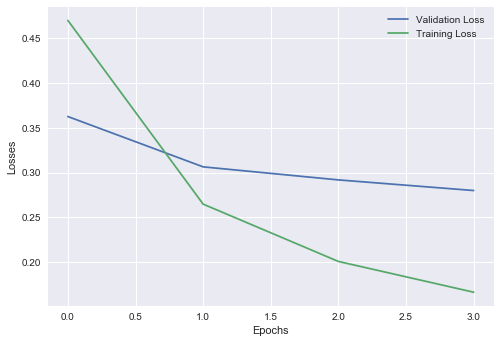

In [64]:
plt.style.use('seaborn')
plt.plot(h['val_loss'],label='Validation Loss')
plt.plot(h['loss'],label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

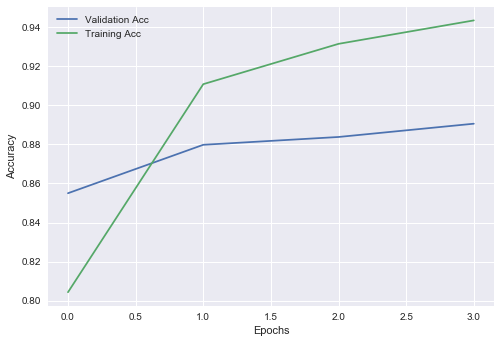

In [65]:
plt.style.use('seaborn')
plt.plot(h['val_accuracy'],label='Validation Acc')
plt.plot(h['accuracy'],label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
model.evaluate(X_test,Y_test)[1]

782/782 [==============================] - 1s 2ms/step - loss: 0.3046 - accuracy: 0.8793


0.8793200254440308

In [67]:
model.evaluate(X_train,Y_train)[1]

782/782 [==============================] - 1s 1ms/step - loss: 0.1562 - accuracy: 0.9490


0.9490000009536743

In [ ]:
model.predict(X_test)